In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

n = 20
x = np.linspace(0, 10, n)
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

simple linear regression

In [2]:
X = sm.add_constant(x)
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.52631579],
       [ 1.        ,  1.05263158],
       [ 1.        ,  1.57894737],
       [ 1.        ,  2.10526316],
       [ 1.        ,  2.63157895],
       [ 1.        ,  3.15789474],
       [ 1.        ,  3.68421053],
       [ 1.        ,  4.21052632],
       [ 1.        ,  4.73684211],
       [ 1.        ,  5.26315789],
       [ 1.        ,  5.78947368],
       [ 1.        ,  6.31578947],
       [ 1.        ,  6.84210526],
       [ 1.        ,  7.36842105],
       [ 1.        ,  7.89473684],
       [ 1.        ,  8.42105263],
       [ 1.        ,  8.94736842],
       [ 1.        ,  9.47368421],
       [ 1.        , 10.        ]])

In [3]:
# beta0, beta1分别设置成2,5
beta = np.array([2, 5])
beta

array([2, 5])

In [4]:
# 误差项
e = np.random.normal(size=n)
e

array([-0.33540466, -0.47019911,  0.37913719,  0.79986532,  0.43552063,
       -0.83608253, -1.20604764,  0.566178  , -0.06155545,  0.97428648,
       -1.27947961, -0.84962843,  0.26360796,  1.48462487, -0.27718123,
        0.50967341, -0.13663151, -1.15186676, -1.2725245 ,  0.50589847])

In [5]:
# 实际值y
y = np.dot(X, beta) + e
y

array([ 1.66459534,  4.16137983,  7.64229509, 10.69460216, 12.96183642,
       14.3218122 , 16.58342604, 20.98723063, 22.99107613, 26.65849701,
       27.03630986, 30.09773999, 33.84255533, 37.69515118, 38.56492403,
       41.98335763, 43.96863164, 45.58497534, 48.09589655, 52.50589847])

In [6]:
# 最小二乘法
model = sm.OLS(y, X)

In [7]:
# 拟合数据
res = model.fit()

In [8]:
# 回归系数
res.params

array([2.00385687, 4.97965053])

In [9]:
# 全部结果
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     6497.
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           1.74e-24
Time:                        13:08:59   Log-Likelihood:                -23.803
No. Observations:                  20   AIC:                             51.61
Df Residuals:                      18   BIC:                             53.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0039      0.361      5.545      0.000       1.245       2.763
x1             4.9797      0.062     80.602      0.000       4.850       5.109
==============================================================================
Omnibus:                        1.292   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                0.857
Skew:                           0.081   Prob(JB):                        0.652
Kurtosis:                       1.999   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# 拟合的估计值
y_ = res.fittedvalues
y_

array([ 2.00385687,  4.62472557,  7.24559428,  9.86646298, 12.48733168,
       15.10820038, 17.72906909, 20.34993779, 22.97080649, 25.59167519,
       28.2125439 , 30.8334126 , 33.4542813 , 36.07515   , 38.69601871,
       41.31688741, 43.93775611, 46.55862481, 49.17949352, 51.80036222])

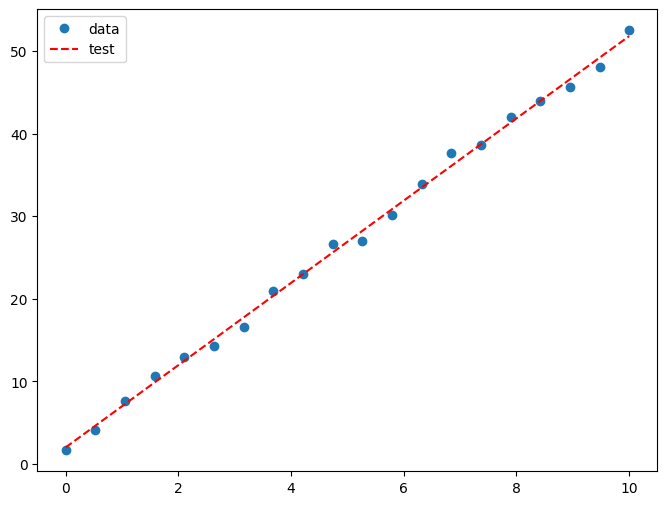

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
# 原始数据
ax.plot(x, y, 'o', label='data')
# 拟合数据
ax.plot(x, y_, 'r--', label='test') 
ax.legend(loc='best')
plt.show()

High-order regression

In [12]:
# y = 5 + 2·x + 3·x^2
n = 50
x = np.linspace(0, 10, n)
X = np.column_stack((x, x**2))
X = sm.add_constant(X)

In [13]:
beta = np.array([5, 2, 3])
e = np.random.normal(size=n)
y = np.dot(X, beta) + e
model = sm.OLS(y, X)
results = model.fit()
results.params

array([4.61516936, 2.20698639, 2.97679578])

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.919e+05
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           1.16e-92
Time:                        13:09:06   Log-Likelihood:                -74.460
No. Observations:                  50   AIC:                             154.9
Df Residuals:                      47   BIC:                             160.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6152      0.451     10.227      0.000       3.707       5.523
x1             2.2070      0.209     10.575      0.000       1.787       2.627
x2             2.9768      0.020    147.490      0.000       2.936       3.017
==============================================================================
Omnibus:                        2.795   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                1.562
Skew:                          -0.102   Prob(JB):                        0.458
Kurtosis:                       2.158   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

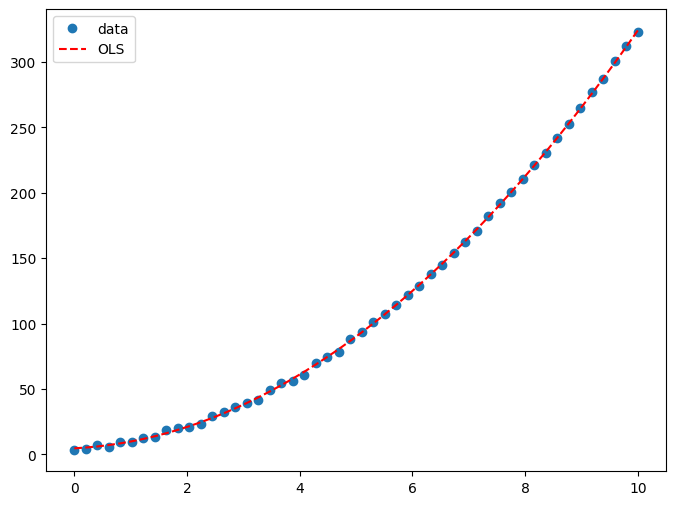

In [15]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8, 6))
# 原始数据
ax.plot(x, y, 'o', label='data')
# 拟合数据
ax.plot(x, y_fitted, 'r--', label='OLS') 
ax.legend(loc='best')
plt.show()

分类变量

假设分类变量有4个取值(a, b, c)，比如考试成绩有3个等级，a是(1, 0, 0)，b是(0, 1, 0)，c是(0, 0, 1)，这个时候就需要3个系数β0, β1，β2，也就是β0·x0 + β1·x1 + β2·x2。

In [16]:
import pandas as pd

In [17]:
n = 50
groups = np.zeros(n, int)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [20]:
groups[20:40] = 1
groups[40:] = 2
# 将 groups 数组转换为 DataFrame
groups_df = pd.DataFrame(groups, columns=['group'])
# 使用 pandas 的 get_dummies 函数创建虚拟变量
# drop_first=True 用于避免虚拟变量陷阱
dummy = pd.get_dummies(groups_df['group'], prefix='group')
# 将 dummy DataFrame 转换回 numpy 数组
dummy_array = dummy.values
# 将 True 和 False 分别转换为 1 和 0
dummy_array = (dummy_array.astype(bool)).astype(float)
dummy_array

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [21]:
# y = 5 + 2·x + 3·z1 + 6·z2 + 9·z3
x = np.linspace(0, 20, n)
X = np.column_stack((x, dummy))
X = sm.add_constant(X)
beta = np.array([5, 2, 3, 6, 9])
e = np.random.normal(size=n)
y = np.dot(X, beta) + e
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3424.
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           4.68e-54
Time:                        13:15:32   Log-Likelihood:                -67.968
No. Observations:                  50   AIC:                             143.9
Df Residuals:                      46   BIC:                             151.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7663      0.557     13.955      0.000       6.646       8.887
x1             2.0744      0.064     32.397      0.000       1.946       2.203
x2             0.0073      0.353      0.021      0.984      -0.703       0.718
x3             2.2568      0.295      7.651      0.000       1.663       2.850
x4             5.5023      0.664      8.280      0.000       4.165       6.840
==============================================================================
Omnibus:                        1.934   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.634
Skew:                          -0.439   Prob(JB):                        0.442
Kurtosis:                       2.888   Cond. No.                     2.01e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.68e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

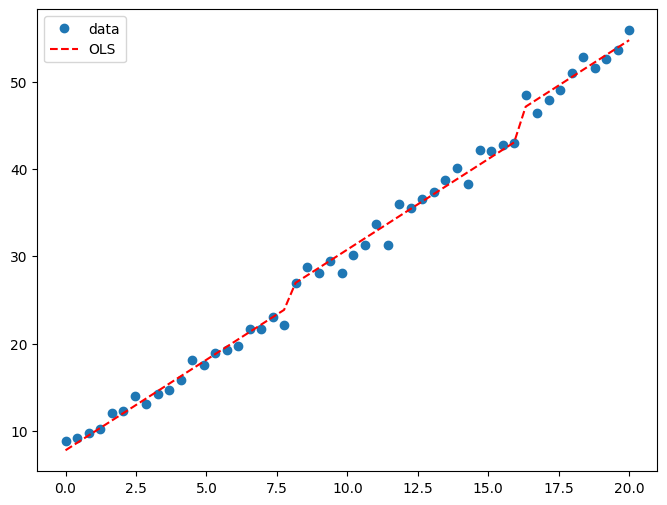

In [22]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8, 6))
# 原始数据
ax.plot(x, y, 'o', label='data')
# 拟合数据
ax.plot(x, y_fitted, 'r--', label='OLS') 
ax.legend(loc='best')
plt.show()